# Business Case: Netflix - Data Exploration and Visualisation

### Problem Statement
* Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

#### The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

* **Show_id:** Unique ID for every Movie / Tv Show
* **Type:** Identifier - A Movie or TV Show
* **Title:** Title of the Movie / Tv Show
* **Director:** Director of the Movie
* **Cast:** Actors involved in the movie/show
* **Country:** Country where the movie/show was produced
* **Date_added:** Date it was added on Netflix
* **Release_year:** Actual Release year of the movie/show
* **Rating:** TV Rating of the movie/show
* **Duration:** Total Duration - in minutes or number of seasons
* **Listed_in:** Genre
* **Description:** Summarization

## High Level Overview
* **Loading and inspecting the Dataset**
    * Checking Shape of the Dateset
    * Meaningful Column names
    * Validating Duplicate Records
    * Checking Missing values
    * Unique values (counts) for each Feature
    * Unique values (names) are checked for Features with a unique value count below 100
    * Data validation - like for rating feature value cannot be duration of the movie.
* **Dataset Preparation**
    * DataType Validation
    * Dervied Columns
* **Univariante Analysis**
    * Movies & TV shows - Distribution
    * A pattern for adding Movies & TV shows content annually, monthly, etc.
    * Release year of a movie or TV show
    * Identify how content is distributed based on maturity level - kids, teens, and adults
    * Netflix's most popular genre
    * Top 20 cast contributed to Netflix content
* **Biivariante Analysis**
    * day content added and Type (Movie or Tv Show)
    * rating and type
* **Summarization of Netflix as per Dataset**

### Importing the required libraries or packages for EDA

In [1]:
import pandas as pd
import numpy as np
import regex as re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from collections import Counter
from matplotlib.ticker import StrMethodFormatter
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

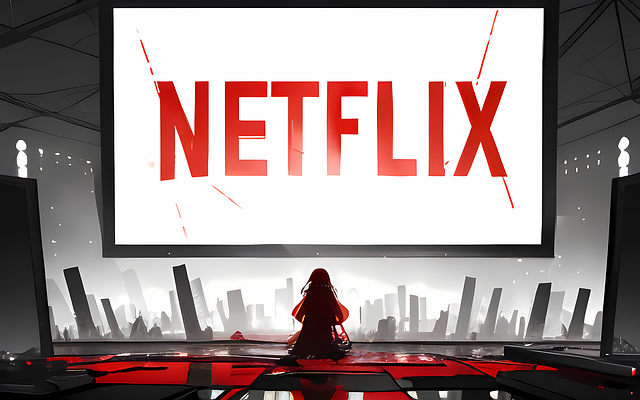

In [2]:
image_path = r"C:\Users\Anshika Chauhan\OneDrive\Desktop\cinema-8072878_640.png"
Image(filename=image_path, width = 800)

In [3]:
df = pd.read_csv(r"C:\Users\Anshika Chauhan\OneDrive\Documents\netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.rename(columns={"listed_in":"genres_category"},inplace= True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres_category', 'description'],
      dtype='object')

In [7]:
df = df.drop_duplicates()
df.shape

(8807, 12)

In [8]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total Records (Raw Data) = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)], axis = 1, keys =['Total Missing','In Percent'])
missing_data.head(10)

Total Records (Raw Data) =  8807


,Total Missing,In Percent
director,2634,29.91
country,831,9.44
cast,825,9.37
date_added,10,0.11
rating,4,0.05
duration,3,0.03
show_id,0,0.00
type,0,0.00
title,0,0.00
release_year,0,0.00


#### Inference
* I found some missing data in data frame, which will remove and rest address during the analysis of each columns.

    * director **29.91%**

    * country **9.44%**

    * cast **9.34%**

    * **0.11%** of total records have missing data for "date_added". These records can be removed while analyzing the             "date_added"   feature.

    * Only 4 records are missing for rating feature which can be fixed using imputation technique.

    * Only 3 records are missing for duration which can be fixed using imputation technique.


In [9]:
df['rating'].replace(to_replace =np.nan, value= "NR", inplace = True)

In [10]:
df['country']= df['country'].fillna(df['country'].mode()[0])

In [11]:
df.nunique()

show_id            8807
type                  2
title              8807
director           4528
cast               7692
country             748
date_added         1767
release_year         74
rating               17
duration            220
genres_category     514
description        8775
dtype: int64

###### Inference:- Here, show_id has no use so I can remove it and In 32 movies has same description, it may be happen when movies relesesed in different language.

In [12]:
df = df.drop('show_id', axis = 1)

In [13]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [14]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

##### Here, Duration can not be rating hence need to correct it.

In [15]:
null_columns = df.columns[df.isnull().any()]
print(df[df["duration"].isnull()][null_columns])

        director        cast          date_added duration
5541  Louis C.K.  Louis C.K.       April 4, 2017      NaN
5794  Louis C.K.  Louis C.K.  September 16, 2016      NaN
5813  Louis C.K.  Louis C.K.     August 15, 2016      NaN


In [16]:
df.loc[df['rating'] == '74 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,genres_category,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [17]:
df.loc[df['rating'] == '84 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,genres_category,description
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [18]:
df.loc[df['rating'] == '66 min']

,type,title,director,cast,country,date_added,release_year,rating,duration,genres_category,description
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [19]:
df.loc[5541,'duration'] ='74 min'
df.loc[5794,'duration'] ='84 min'
df.loc[5813,'duration'] ='66 min'

In [20]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total Records (Raw Data) = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)], axis = 1, keys =['Total Missing','In Percent'])
missing_data.head(5)

Total Records (Raw Data) =  8807


,Total Missing,In Percent
director,2634,29.91
cast,825,9.37
date_added,10,0.11
type,0,0.00
title,0,0.00


##### using Imputaion techiniq to replace the duration valur to 'NR'

In [21]:
df['rating'].replace({'74 min':'NR'},inplace=True)
df['rating'].replace({'84 min':'NR'},inplace=True)
df['rating'].replace({'66 min':'NR'},inplace=True)

##### Lets check whether it is implemented the value

In [22]:
df.loc[5541]

type                                                           Movie
title                                                Louis C.K. 2017
director                                                  Louis C.K.
cast                                                      Louis C.K.
country                                                United States
date_added                                             April 4, 2017
release_year                                                    2017
rating                                                            NR
duration                                                      74 min
genres_category                                               Movies
description        Louis C.K. muses on religion, eternal love, gi...
Name: 5541, dtype: object

In [23]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

### Data Preparation 

##### Check the Data Type

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             8807 non-null   object
 1   title            8807 non-null   object
 2   director         6173 non-null   object
 3   cast             7982 non-null   object
 4   country          8807 non-null   object
 5   date_added       8797 non-null   object
 6   release_year     8807 non-null   int64 
 7   rating           8807 non-null   object
 8   duration         8807 non-null   object
 9   genres_category  8807 non-null   object
 10  description      8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


##### Inference

* date_added is datetime data type, hence need to update the data type

In [25]:
df["date_added"] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             8807 non-null   object        
 1   title            8807 non-null   object        
 2   director         6173 non-null   object        
 3   cast             7982 non-null   object        
 4   country          8807 non-null   object        
 5   date_added       8797 non-null   datetime64[ns]
 6   release_year     8807 non-null   int64         
 7   rating           8807 non-null   object        
 8   duration         8807 non-null   object        
 9   genres_category  8807 non-null   object        
 10  description      8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


#### Derived Columns

* Added new feature - **"Year Added"** from the date_added feature
* Added new feature - **"Month Added"** from the date_added feature
* Added new feature - **"Day Added"** from the date_added feature
* Added new feature - **"Weekday Added"** from the date_added feature
* Added new feature - rating Category based on whether the content is suitable for **Kids, Teenagers and Adults**
* Added new feature - **Season Count** for each TV shows.

In [26]:
df_date = df.copy()
df.shape

(8807, 11)

##### Removed the missing values before Analysising

In [27]:
df_date.dropna(subset =['date_added'],inplace = True)
df_date.shape

(8797, 11)

##### New feature Added - year_added,month_added,day_added & Weekday_added

In [28]:
df_date['year_added'] = df_date['date_added'].dt.year
df_date["year_added"] = df_date["year_added"].astype("Int64")
df_date["month_added"] = df_date['date_added'].dt.month
df_date["month_added"] = df_date["month_added"].astype("Int64")
df_date["day_added"] = df_date['date_added'].dt.day
df_date["day_added"] = df_date["day_added"].astype("Int64")
df_date['Weekday_added'] = df_date['date_added'].apply(lambda x: parse(str(x)).strftime("%A"))

In [29]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             8797 non-null   object        
 1   title            8797 non-null   object        
 2   director         6173 non-null   object        
 3   cast             7972 non-null   object        
 4   country          8797 non-null   object        
 5   date_added       8797 non-null   datetime64[ns]
 6   release_year     8797 non-null   int64         
 7   rating           8797 non-null   object        
 8   duration         8797 non-null   object        
 9   genres_category  8797 non-null   object        
 10  description      8797 non-null   object        
 11  year_added       8797 non-null   Int64         
 12  month_added      8797 non-null   Int64         
 13  day_added        8797 non-null   Int64         
 14  Weekday_added    8797 non-null   object 

##### New Feature added "ratings_cat"

* Classifying the 'rating' feature into three categories. (Kids, Teenagers, Adults)

| Rating | Category   |
|--------|------------|
| TV-Y   | Kids       |
| TV-Y7  | Kids       |
| TV-Y7-FV | Kids      |
| G      | Kids       |
| TV-G   | Kids       |
| PG     | Kids       |
| TV-PG  | Kids       |
| PG-13  | Teenagers  |
| TV-14  | Teenagers  |
| TV-MA  | Adults     |
| R      | Adults     |
| NC-17  | Adults     |
| NR     | Adults     |
| UR     | Adults     |

In [30]:
df['rating_cat'] = df['rating']

In [31]:
custom_rating = {  'TV-Y':'Kids','TV-Y7':'Kids' ,'TV-G':'Kids','PG':'Kids','TV-PG':'Kids','TV-Y7-FV':'Kids','G': 'Kids',
                 'PG-13':'Teenagers','TV-14' : 'Teenagers',
                 'R'     : 'Adults', 'TV-MA' : 'Adults','NC-17' : 'Adults','NR': 'Adults','UR': 'Adults'} 

df['ratings_cat'] = df['rating'].replace(to_replace = custom_rating)

In [32]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genres_category,description,rating_cat,ratings_cat
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",PG-13,Teenagers
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV-MA,Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV-MA,Adults
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV-MA,Adults
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,TV-MA,Adults


##### Analyzing Descriptive statistics about each feature, such as count, min, max, and mean.

In [33]:
df_date.describe()

,release_year,year_added,month_added,day_added
count,8797.000000,8797.000000,8797.000000,8797.000000
mean,2014.183472,2018.871888,6.654996,12.497329
std,8.822191,1.574243,3.436554,9.887551
min,1925.000000,2008.000000,1.000000,1.000000
25%,2013.000000,2018.000000,4.000000,1.000000
50%,2017.000000,2019.000000,7.000000,13.000000
75%,2019.000000,2020.000000,10.000000,20.000000
max,2021.000000,2021.000000,12.000000,31.000000


##### Inference

* Netflix has **25%** of movies and TV shows that were released within the **last two years**
* About **75%** of Netflix's content consists of **movies and TV shows released after 2013**
* Data from Netflix shows that **new trend movies or TV shows are more prevalent.**
* For more subscribers, Netflix should invest in **classic Movies and TV shows.**

## Univariate Analysis

#### Feature Name 4

* **Type** - Movies & TV shows - Distribution
* **date_added** - Checking number of new Contents added yearly, monthly, which date and Weekend-Weekday
* **release_year** - Movies and TV shows release_year trend.
* **ratings & ratings_cat** - Identify how content is distributed based on maturity level - kids, teens, and adults
* **genres** - Netflix's most popular genre
* **cast** - Top 20 cast contributed to Netflix content

#### Movies & TV shows - Distribution

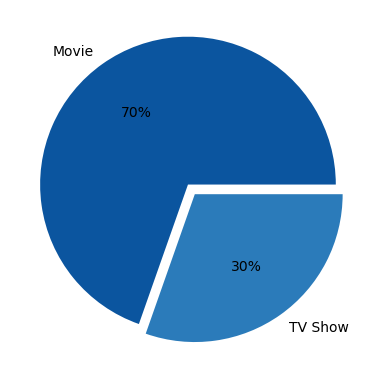

In [34]:
data = df.groupby("type")['type'].count()

explode = (0.08,0)
labels = ['Movie','TV Show']
colors = sns.color_palette("Blues_r")
plt.pie(data, labels= labels,colors = colors, autopct= '%0.0f%%', explode= explode)
plt.show()

#### Inference

* Netflix has **70%** of its content as movies
* **Movies** are clearly **more popular on Netflix than TV shows.**

#### Checking number of new Contents added yearly

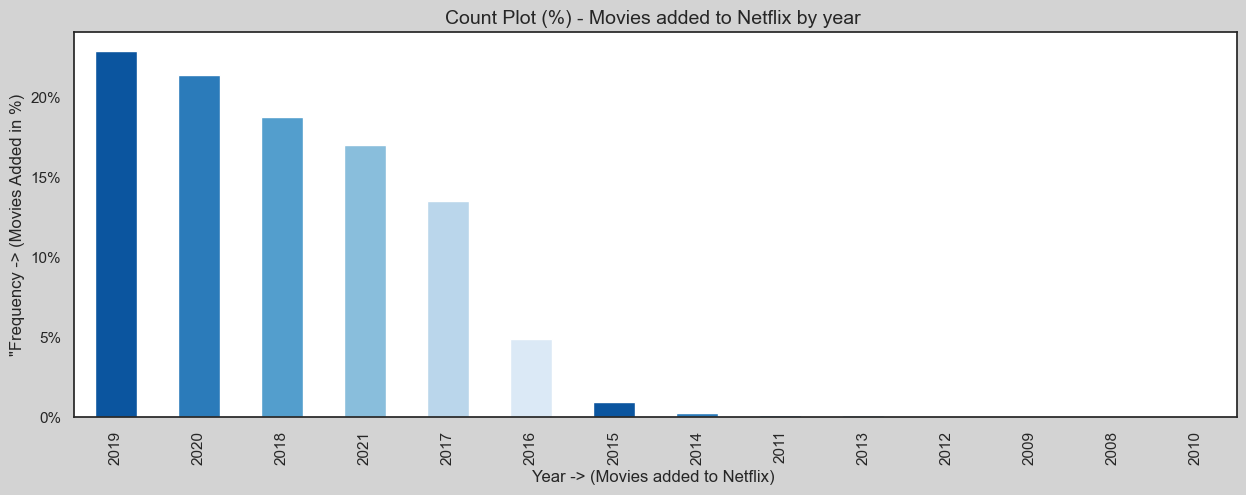

In [35]:
fig = plt.figure(figsize=(15,5))
sns.set(style='white')
fig.set_facecolor("lightgrey")
count = (df_date['year_added'].value_counts(normalize=True)*100)
ax=count.plot.bar(color=sns.color_palette('Blues_r'))
bar_width = 0.5
for bar in ax.patches:
    bar.set_width(bar_width)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))
plt.title('Count Plot (%) - Movies added to Netflix by year ', fontsize=14)
plt.ylabel('"Frequency -> (Movies Added in %)', fontsize=12)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=12)
plt.show()

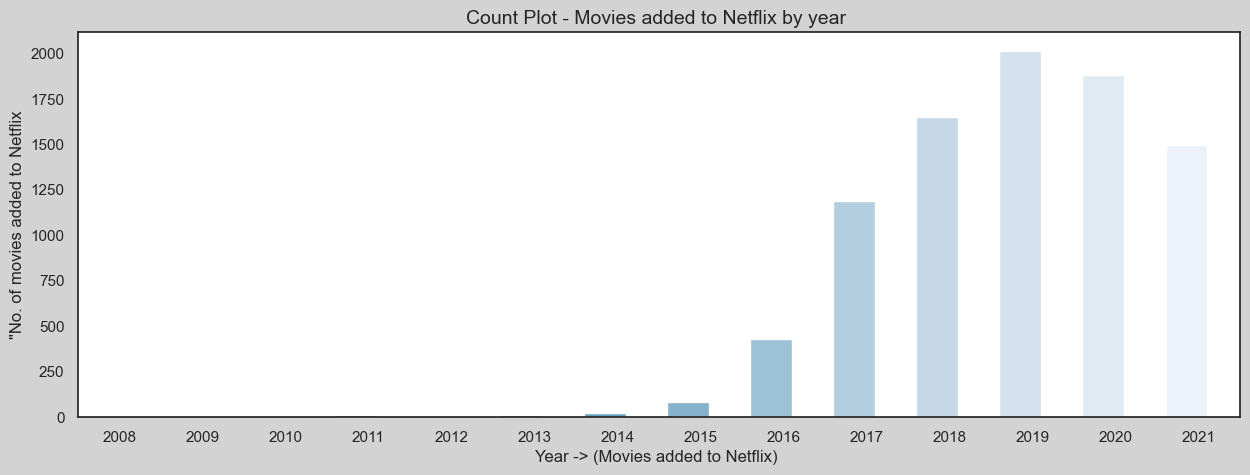

In [36]:
fig = plt.figure(figsize=(15,5))
sns.set(style='white')
fig.set_facecolor("lightgrey")
ax=sns.countplot(data=df_date,x = 'year_added',palette ="Blues_r")
bar_width = 0.5
for bar in ax.patches:
    bar.set_width(bar_width)
plt.title('Count Plot - Movies added to Netflix by year ', fontsize=14)
plt.ylabel('"No. of movies added to Netflix', fontsize=12)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=12)
plt.show()

##### Inference

* According to the above graph, Netflix has started adding content **since 2014.**
* The popularity of OTT has boomed in the **last 5 years,** so we're seeing a **dramatic increase in content being added.**
* There were **2000 (23%) Movies and TV shows** added in the year 2019 (Highest until date).

##### Checking number of new Contents added montly

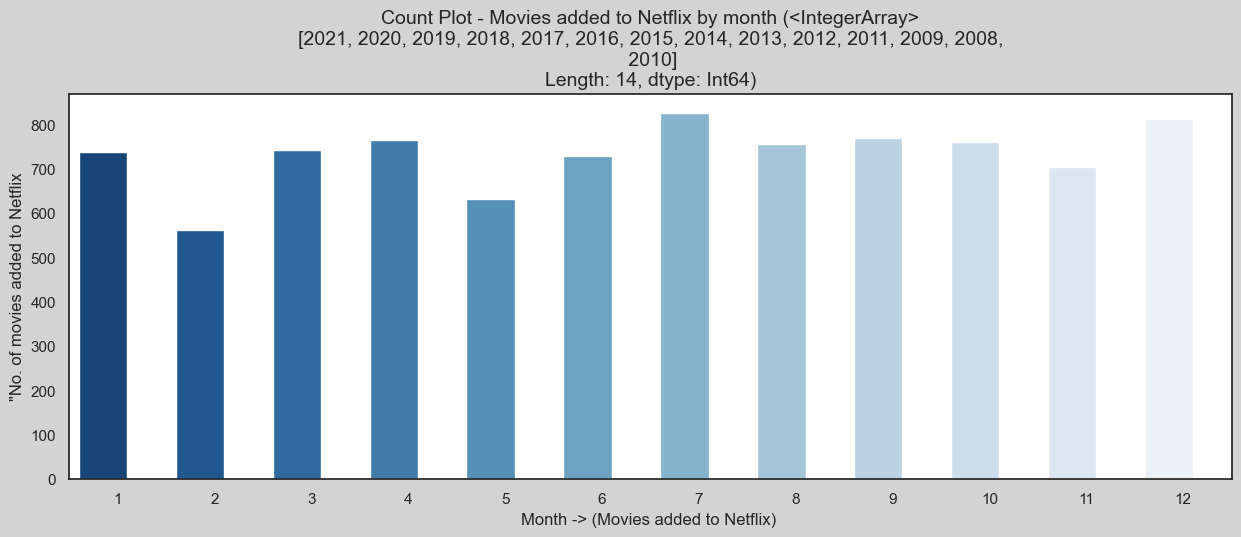

In [37]:
fig = plt.figure(figsize=(15,5))
sns.set(style='white')
fig.set_facecolor("lightgrey")
ax=sns.countplot(data=df_date,x = 'month_added',palette ="Blues_r")
bar_width = 0.5
for bar in ax.patches:
    bar.set_width(bar_width)
year_information = df_date['year_added'].unique()
plt.title(f'Count Plot - Movies added to Netflix by month ({year_information})', fontsize=14)
plt.ylabel('"No. of movies added to Netflix', fontsize=12)
plt.xlabel('Month -> (Movies added to Netflix) ', fontsize=12)
plt.show()

##### Inference
* Each month, we see consistent content additions

##### Checking number of new Contents on Weekends

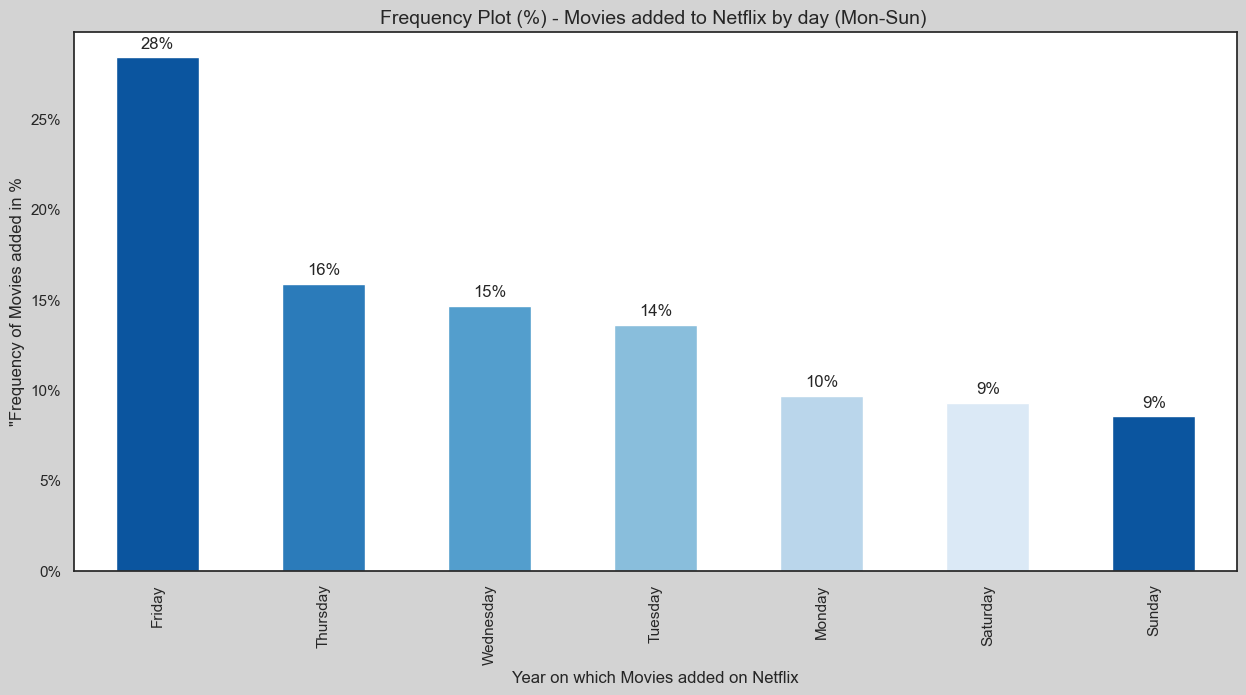

In [38]:
fig = plt.figure(figsize=(15,7))
sns.set(style='white')
fig.set_facecolor("lightgrey")
count = (df_date['Weekday_added'].value_counts(normalize=True)*100)
ax = count.plot.bar(color=sns.color_palette('Blues_r'))
bar_width = 0.5
for bar in ax.patches:
    bar.set_width(bar_width)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Frequency Plot (%) - Movies added to Netflix by day (Mon-Sun) ', fontsize=14)
plt.ylabel('"Frequency of Movies added in %', fontsize=12)
plt.xlabel('Year on which Movies added on Netflix', fontsize=12)
plt.show()

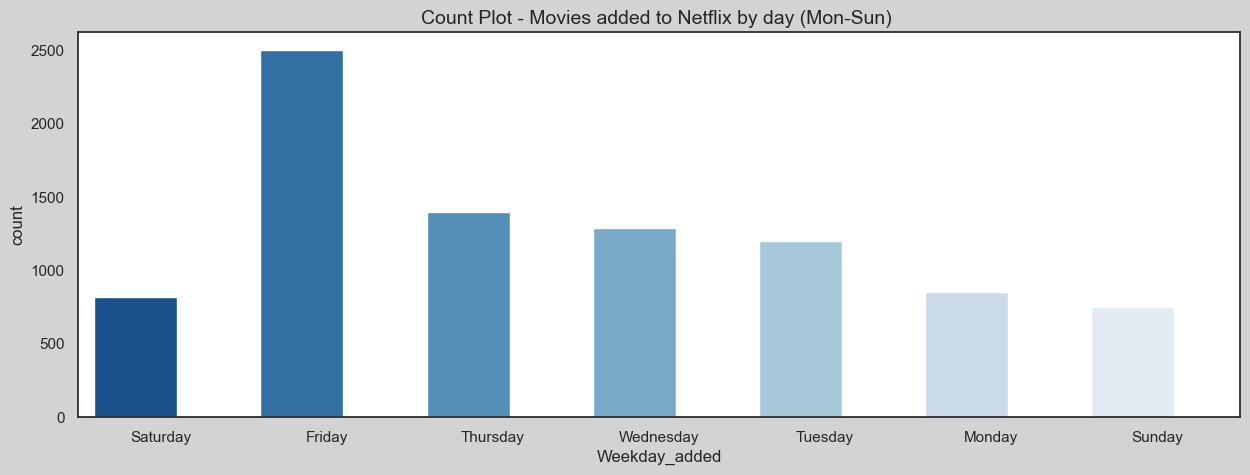

In [39]:
fig = plt.figure(figsize=(15,5))
sns.set(style='white')
fig.set_facecolor("lightgrey")
ax=sns.countplot(data=df_date,x = 'Weekday_added',palette ="Blues_r")
bar_width = 0.5
for bar in ax.patches:
    bar.set_width(bar_width)
plt.title('Count Plot - Movies added to Netflix by day (Mon-Sun) ', fontsize=14)
plt.show()

##### Inference
* Netflix adds 45% of its content on Thursdays and Fridays.
* On Friday, new content should be added.
* Over the weekend, less than 20% of content is added.

##### Checking when should new content be added to the site

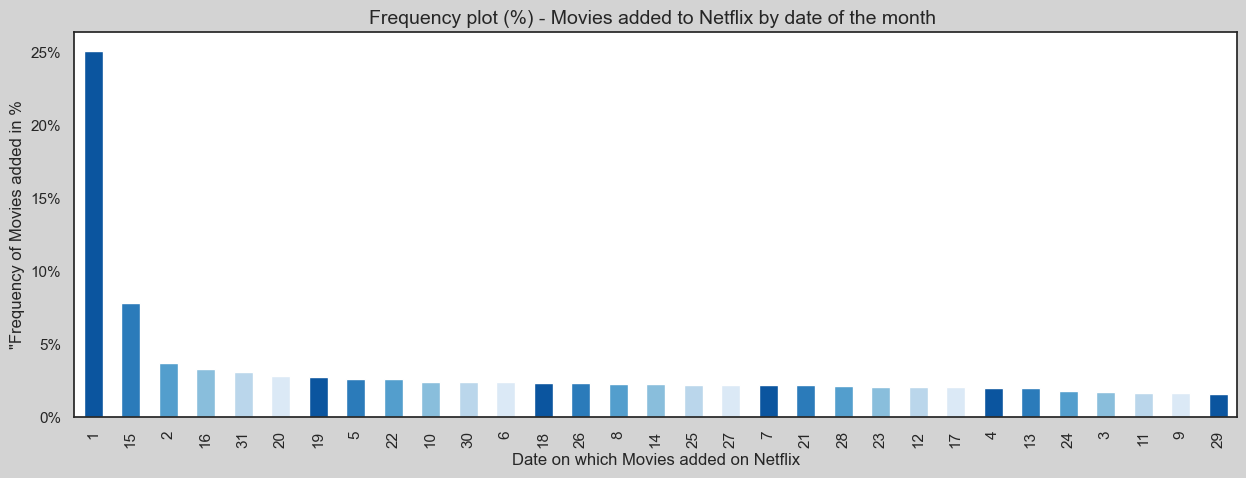

In [40]:
fig = plt.figure(figsize=(15,5))
sns.set(style='white')
fig.set_facecolor("lightgrey")
count = (df_date['day_added'].value_counts(normalize=True)*100)
count.plot.bar(color=sns.color_palette('Blues_r'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))
plt.title('Frequency plot (%) - Movies added to Netflix by date of the month ', fontsize=14)
plt.ylabel('"Frequency of Movies added in %', fontsize=12)
plt.xlabel('Date on which Movies added on Netflix', fontsize=12)
plt.show()

##### Inference
* It was evident that 1st of every month was when the most content was added.

##### Distribution of Release year

In [41]:
bins = [1941,2000,2011,2014,2016,2018,2020,2021]
df_date_v1 = df_date.groupby(pd.cut(df_date['release_year'], bins=bins)).release_year.count()
bins = [1941,2000,2011,2013,2021]
df_date_v2 = df_date.groupby(pd.cut(df_date['release_year'], bins=bins)).release_year.count()

In [42]:
df_date_bin = df_date_v1.to_frame()
df_date_bin.rename(columns = {"release_year":"count"},inplace= True)
df_date_bin1 = df_date_v2.to_frame()
df_date_bin1.rename(columns = {"release_year":"count"},inplace= True)

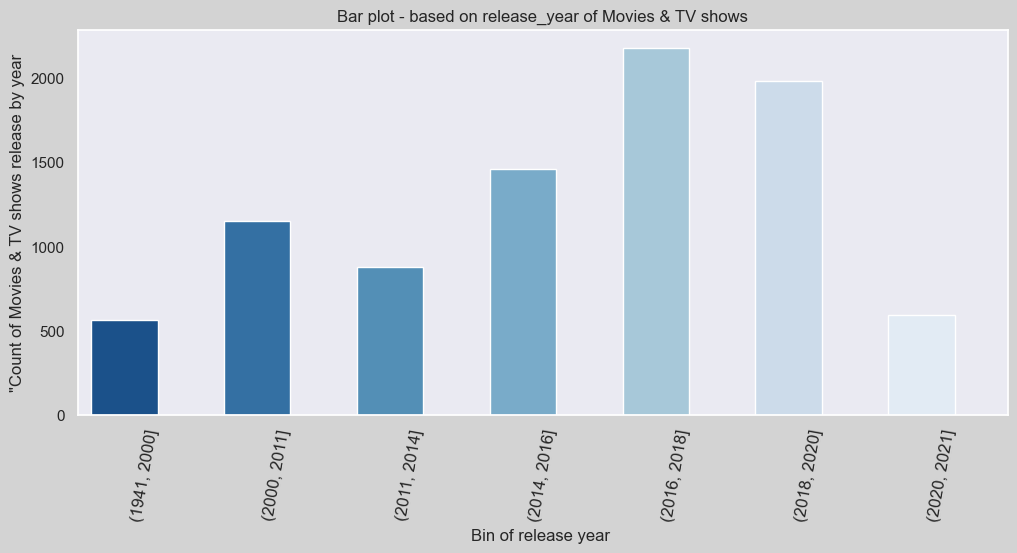

In [43]:
fig = plt.figure(figsize=(12,5))
sns.set(style = "dark")
fig.set_facecolor("lightgrey")
ax=sns.barplot(x=df_date_bin.index,y='count',data=df_date_bin,palette="Blues_r")
bar_width = 0.5
for bar in ax.patches:
    bar.set_width(bar_width)
plt.title('Bar plot - based on release_year of Movies & TV shows', fontsize=12)
plt.ylabel('"Count of Movies & TV shows release by year', fontsize=12)
plt.xlabel('Bin of release year ', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)

plt.show()

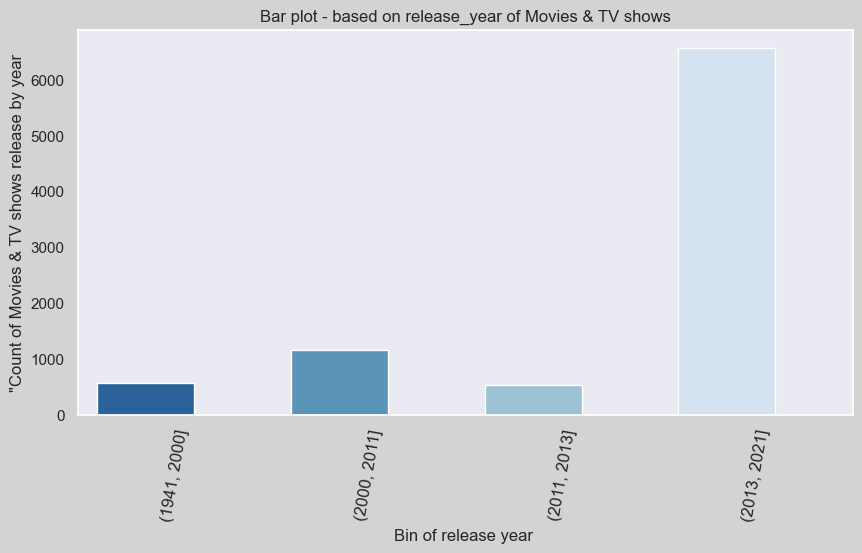

In [44]:
fig = plt.figure(figsize=(10,5))
sns.set(style = "dark")
fig.set_facecolor("lightgrey")
ax=sns.barplot(x=df_date_bin1.index,y='count',data=df_date_bin1,palette="Blues_r")
bar_width = 0.5
for bar in ax.patches:
    bar.set_width(bar_width)
plt.title('Bar plot - based on release_year of Movies & TV shows', fontsize=12)
plt.ylabel('"Count of Movies & TV shows release by year', fontsize=12)
plt.xlabel('Bin of release year ', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
plt.show()

##### Inference
* Netflix began adding content in 2014 as indicated by the "added_year" analysis mentioned above.
* Added content has a release date ranging from 2014 till now for **75% of movies and TV shows.** This shows Netflix encourages content creators to add new content in the platform.
* New content creators have a **lot of opportunities to share their content on Netflix.**

##### Identify how content is distributed based on maturity level - kids, teens, and adults

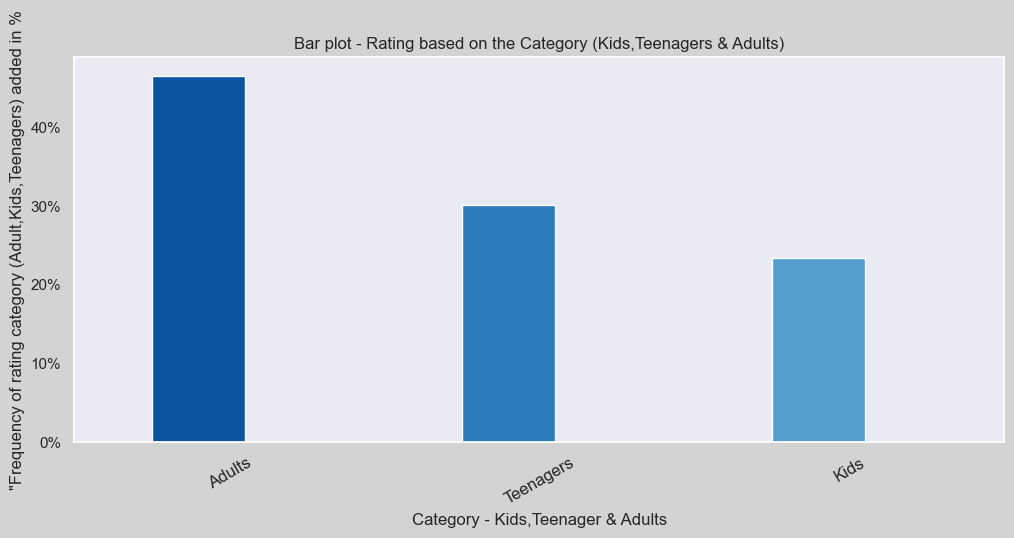

In [45]:
fig = plt.figure(figsize=(12,5))
sns.set(style = "dark")
fig.set_facecolor("lightgrey")
count = df['ratings_cat'].value_counts(normalize=True)*100
ax = count.plot.bar(color=sns.color_palette('Blues_r'))
bar_width = 0.3
for bar in ax.patches:
    bar.set_width(bar_width)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))
plt.title('Bar plot - Rating based on the Category (Kids,Teenagers & Adults)', fontsize=12)
plt.ylabel('"Frequency of rating category (Adult,Kids,Teenagers) added in %', fontsize=12)
plt.xlabel('Category - Kids,Teenager & Adults', fontsize=12)
plt.xticks(rotation = 30,fontsize=12)
plt.show()

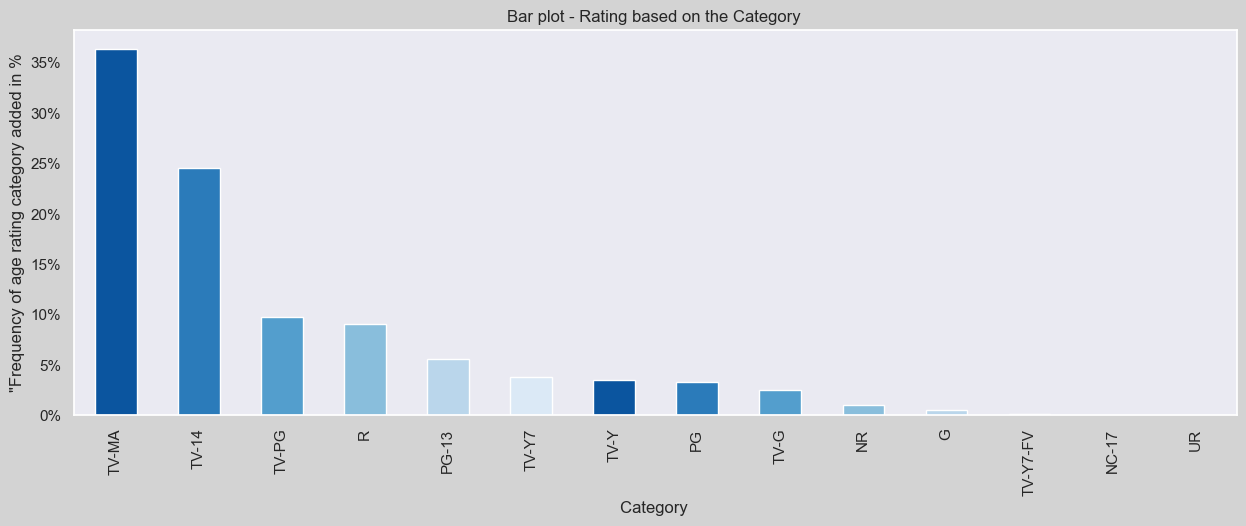

In [46]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "dark")
fig.set_facecolor("lightgrey")
count = df['rating'].value_counts(normalize=True)*100
ax = count.plot.bar(color=sns.color_palette('Blues_r'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))
plt.title('Bar plot - Rating based on the Category ', fontsize=12)
plt.ylabel('"Frequency of age rating category added in %', fontsize=12)
plt.xlabel('Category ', fontsize=12)
plt.show()

In [47]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres_category', 'description',
       'rating_cat', 'ratings_cat'],
      dtype='object')

##### Inference
* On Netflix, 48% of the content (both Movies and TV shows) is for adults.
* According to the graph above, more than 60% of "TV & Shows" content is not suitable for kids.
* More kid-friendly content could increase subscriber numbers.

#### Genres

In [48]:
genres_category = ", ".join(df['genres_category']).split(", ")
genres_category

genre_cnt = Counter()
for genre in genres_category:
    genre_cnt[genre] += 1

top_20_genre = genre_cnt.most_common(20)
netflix_genres = pd.DataFrame (top_20_genre, columns = ['Genres Category','Genres Count'])
netflix_genres.head()

,Genres Category,Genres Count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


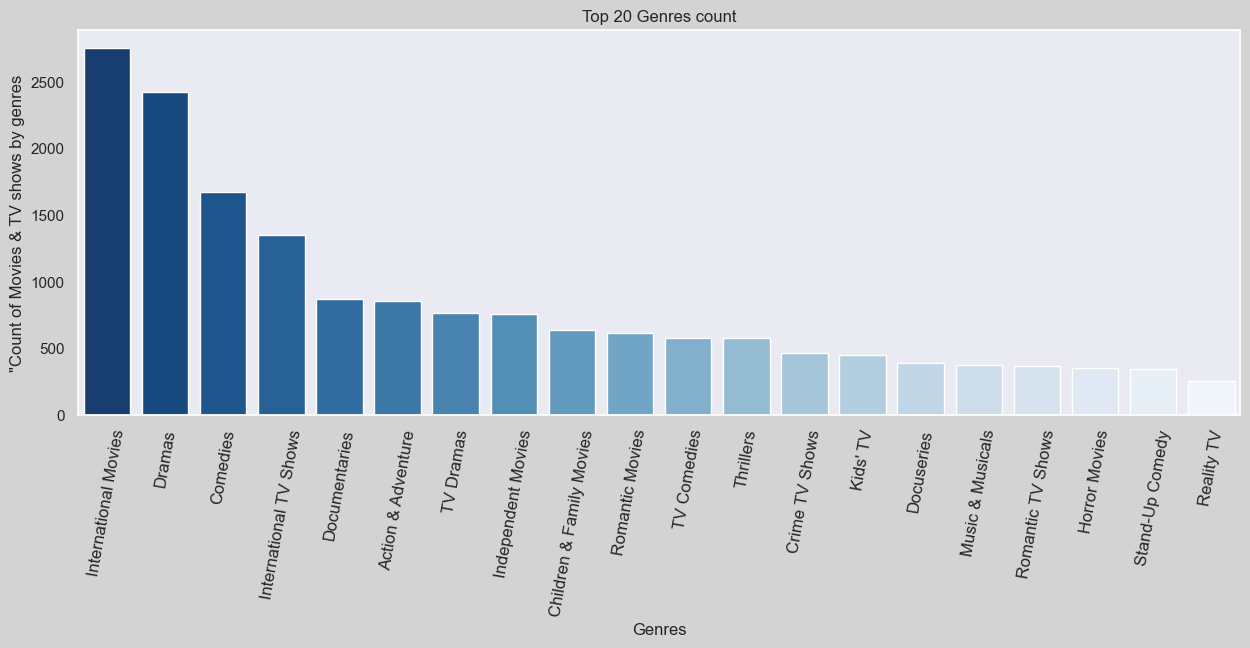

In [49]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "dark")
fig.set_facecolor("lightgrey")
sns.barplot(x='Genres Category',y='Genres Count',data=netflix_genres,palette="Blues_r")
plt.title('Top 20 Genres count', fontsize=12)
plt.ylabel('"Count of Movies & TV shows by genres', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
plt.show()

##### Inference
* As can be seen from the graph above, "International Movies & Dramas" are the top genre contributor to Netflix.

#### Top 20 cast contributed to Netflix content
* Top 20 actors who have contributed the most movies to Netflix content.
* Top 20 actors who have contributed the most TV shows to Netflix content.

#### Top 20 actors who have contributed the most movies to Netflix content

In [50]:
netflix_cast = df.groupby(["type","cast"])["cast"].count().unstack('type')
netflix_cast.columns =['Movie', 'TV Show']
netflix_movie_cast = netflix_cast[netflix_cast["Movie"].notnull()].iloc[:,:1]
netflix_movie_cast.reset_index(level='cast', inplace=True)
netflix_movie_cast.head()

,cast,Movie
0,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",1.0
1,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",1.0
2,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",1.0
3,A.R. Rahman,1.0
4,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",1.0


In [51]:
moviecast = ", ".join(netflix_movie_cast['cast']).split(", ")
moviecast
cnt_moviecast = Counter()

for cast in moviecast:
    cnt_moviecast[cast] += 1

moviecast = cnt_moviecast.most_common(20)
netflix_moviecast = pd.DataFrame (moviecast, columns = ['Actor','Actor Count'])
netflix_moviecast.head(10)

,Actor,Actor Count
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30
5,Paresh Rawal,28
6,Amitabh Bachchan,28
7,Boman Irani,27
8,Kareena Kapoor,25
9,Samuel L. Jackson,22


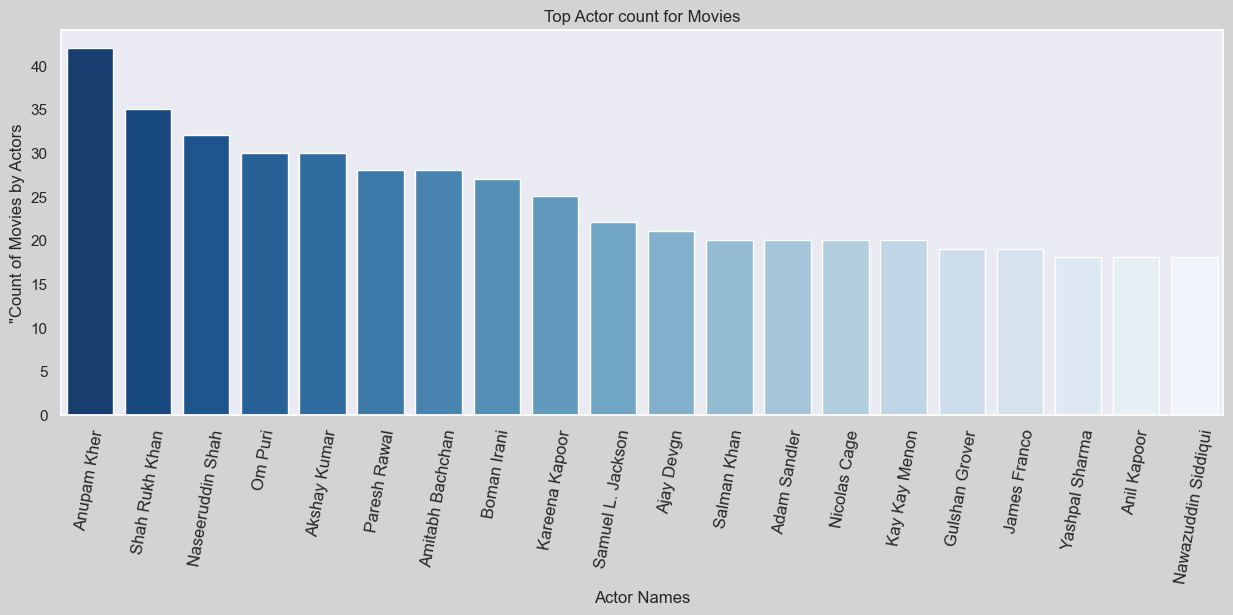

In [52]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "dark")
fig.set_facecolor("lightgrey")
sns.barplot(x='Actor',y='Actor Count',data=netflix_moviecast,palette="Blues_r")
plt.title('Top Actor count for Movies', fontsize=12)
plt.ylabel('"Count of Movies by Actors', fontsize=12)
plt.xlabel('Actor Names', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
plt.show()

##### Inference
* Based on the above data, the majority of Netflix movies are starring Indian actors.

#### Top 20 actors who have contributed the most TV shows to Netflix content.

In [53]:
netflix_tv_show_cast = netflix_cast[netflix_cast["TV Show"].notnull()].iloc[:,1:2]
netflix_tv_show_cast.reset_index(level='cast', inplace=True)
tv_show_cast = ", ".join(netflix_tv_show_cast['cast']).split(", ")
tv_show_cast
cnt_tv_show_cast = Counter()

for cast in tv_show_cast:
    cnt_tv_show_cast[cast] += 1

tv_show_cast = cnt_tv_show_cast.most_common(20)
netflix_tvshow_cast = pd.DataFrame (tv_show_cast, columns = ['Actor','Actor Count'])
netflix_tvshow_cast.head(10)

,Actor,Actor Count
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Junichi Suwabe,17
3,Daisuke Ono,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Yoshimasa Hosoya,15
7,Jun Fukuyama,15
8,Hiroshi Kamiya,13
9,Kana Hanazawa,13


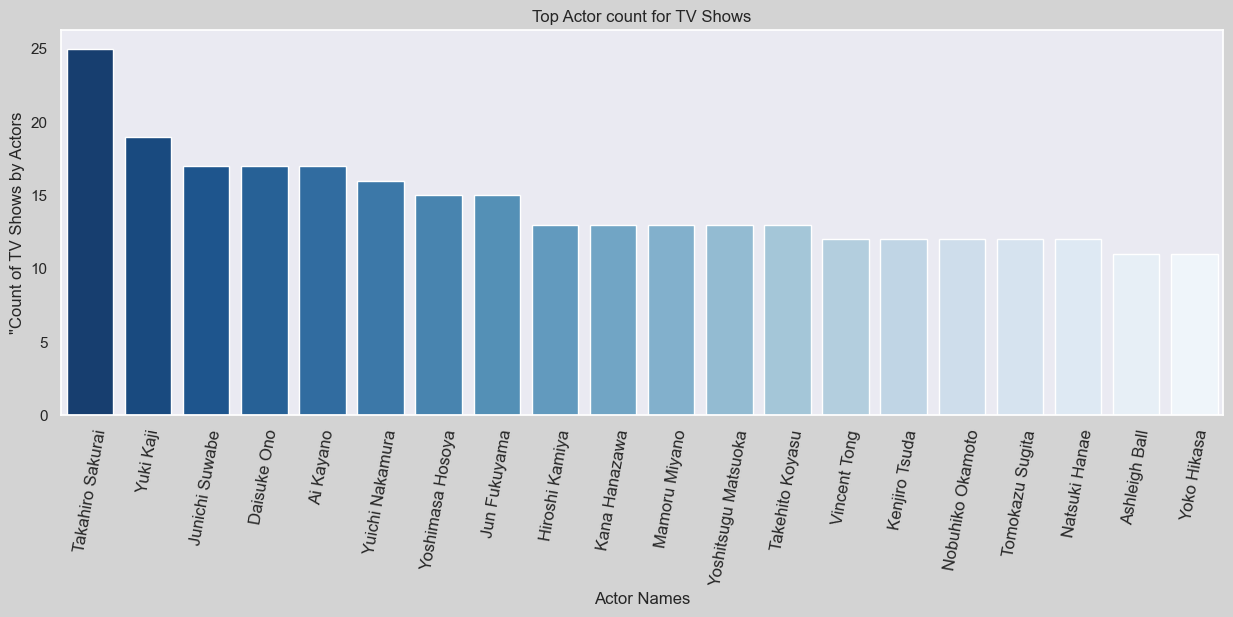

In [54]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "dark")
fig.set_facecolor("lightgrey")
sns.barplot(x='Actor',y='Actor Count',data=netflix_tvshow_cast,palette="Blues_r")
plt.title('Top Actor count for TV Shows', fontsize=12)
plt.ylabel('"Count of TV Shows by Actors', fontsize=12)
plt.xlabel('Actor Names', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
plt.show()

##### Inference
* In TV and shows, there was a mix of stars from around the world.

#### Distribution of Movie Duration

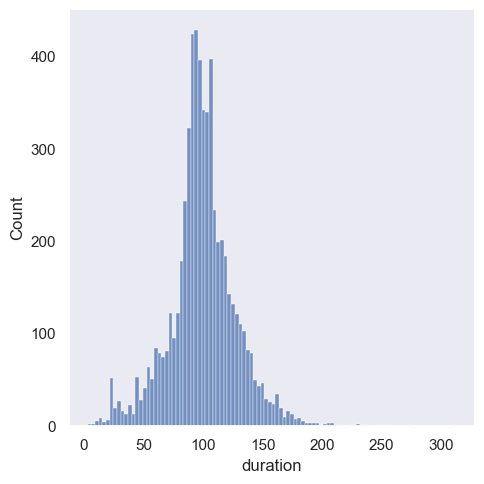

In [55]:
netflix_data_mv = df[df["type"] == "Movie"].copy()
netflix_data_mv['duration'] = netflix_data_mv['duration'].str.extract('(\d+)').astype(float)
sns.displot(data=netflix_data_mv,x='duration',bins=100,color="b")
plt.show()

In [56]:
df['season_cnt'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

#### No. of seasons per TV Shows.

In [57]:
netflix_season_cnt = df['season_cnt'].value_counts().reset_index()
netflix_season_cnt = netflix_season_cnt.rename(columns = {'season_cnt' : "count", "index" : 'season'})
netflix_season_cnt.loc[0,'season'] = 0
netflix_season_cnt.head(5)

,season,count
0,0,6131
1,1,1793
2,2,425
3,3,199
4,4,95


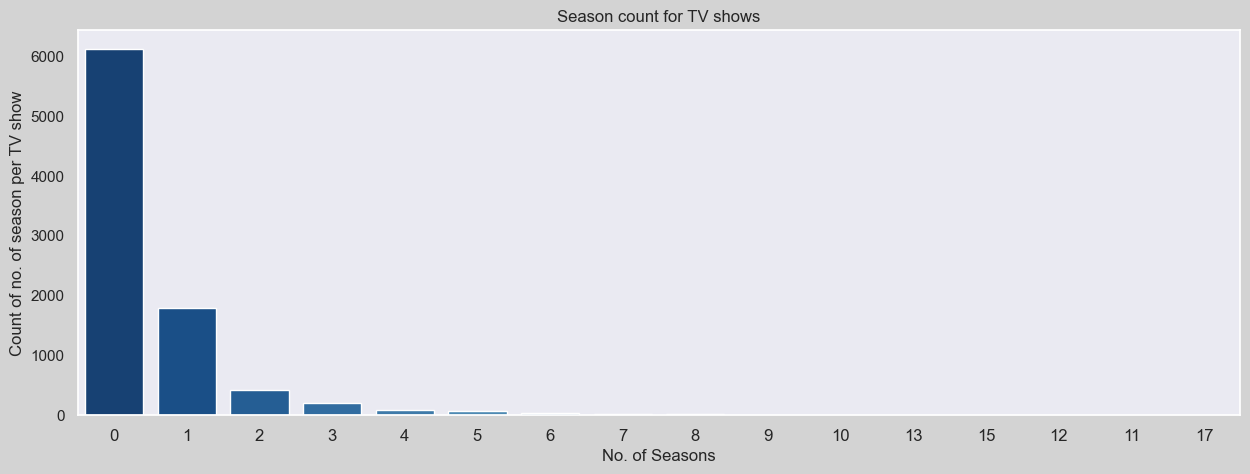

In [58]:
fig = plt.figure(figsize=(15,5))
sns.set(style = "dark")
fig.set_facecolor("lightgrey")
sns.barplot(x='season',y='count',data=netflix_season_cnt,palette="Blues_r")
plt.title('Season count for TV shows', fontsize=12)
plt.ylabel('Count of no. of season per TV show', fontsize=12)
plt.xlabel('No. of Seasons', fontsize=12)
plt.xticks(rotation = 0,fontsize=12)
plt.show()

#### Bi-variant Analysis

##### Bi-variante analysis for below mentioned variables
* Day content added and Type (Movie or Tv Show)
* Rating and type

##### Day content added and Type (Movie or Tv Show)
* As we have seen earlier that It was evident that 1st of every month was when the most content was added. Now it make sense to undersand how is the distribution based on Type.

In [59]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             8797 non-null   object        
 1   title            8797 non-null   object        
 2   director         6173 non-null   object        
 3   cast             7972 non-null   object        
 4   country          8797 non-null   object        
 5   date_added       8797 non-null   datetime64[ns]
 6   release_year     8797 non-null   int64         
 7   rating           8797 non-null   object        
 8   duration         8797 non-null   object        
 9   genres_category  8797 non-null   object        
 10  description      8797 non-null   object        
 11  year_added       8797 non-null   Int64         
 12  month_added      8797 non-null   Int64         
 13  day_added        8797 non-null   Int64         
 14  Weekday_added    8797 non-null   object 

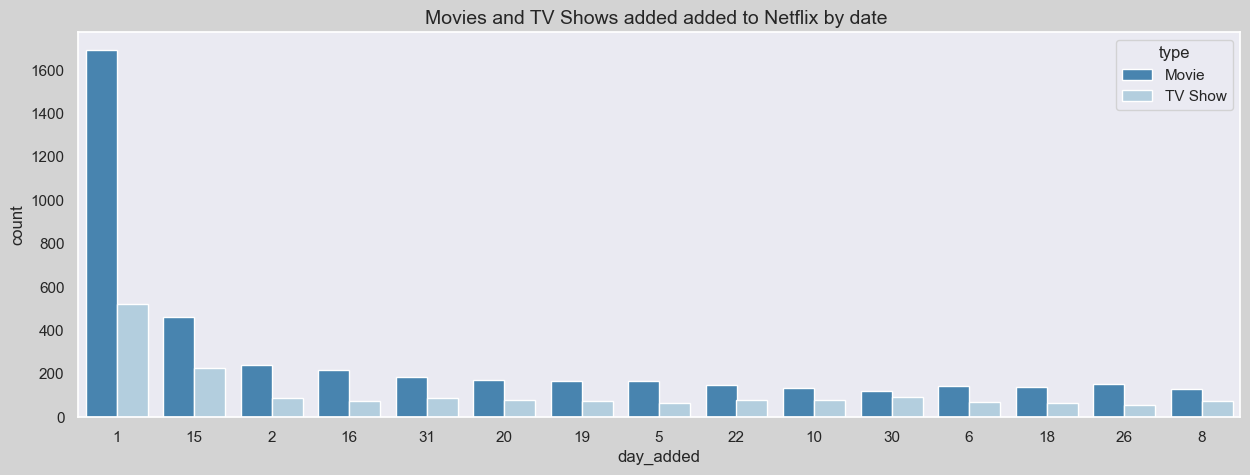

In [60]:
fig = plt.figure(figsize=(15,5))
sns.set(style='dark')
fig.set_facecolor("lightgrey")
sns.countplot(data=df_date,x = 'day_added',hue = 'type',palette ="Blues_r",
              order = df_date['day_added'].value_counts().index[0:15])
plt.title('Movies and TV Shows added added to Netflix by date ', fontsize=14)
plt.show()

##### Infernce
* It was evident that 1st of every month was when the most content was added. Among these, **71% are Movies, while 21% are TV shows.** It highly recommend that Movies to be added at the beginning of every month.


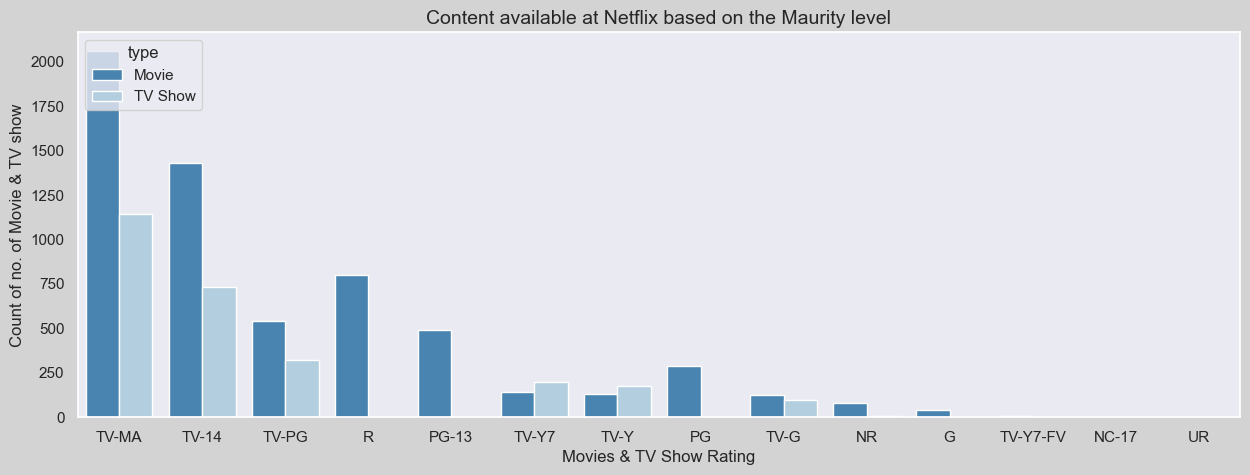

In [61]:
fig = plt.figure(figsize=(15,5))
sns.set(style='dark')
fig.set_facecolor("lightgrey")
sns.countplot(data=df, x="rating", hue="type", palette="Blues_r",
           order = df['rating'].value_counts().index[0:15])
plt.title('Content available at Netflix based on the Maurity level', fontsize=14)
plt.ylabel('Count of no. of Movie & TV show', fontsize=12)
plt.xlabel('Movies & TV Show Rating', fontsize=12)
plt.show()

# Summarization for Netflix as per Dataset
* Only 25% of Netflix's content consists of movies and TV shows released before 2013.
    * **For more subscribers, Netflix should invest in classic Movies and TV shows.**
* Netflix adds **45% of its content on Thursdays and Fridays.** This may be due to the fact that people are likely to watch more content during weekends.
    * **For content creators or Netflix, Thursday and Friday are recommended dates to release content.**
* It was evident that 1st of every month was when the most content was added. Among these, **71% are Movies,** **while    21% are TV shows.**
    * It highly recommend that Movies be added at the beginning of every month.
    * In addition, Netflix will know when the majority of content is being added. If Netflix team needs to increase the           servers, etc., they can work ahead of time and it will have one time cost per month or quarter.
* Netflix began adding content in 2014 as indicated by the "added_year" analysis mentioned above. Added content has a   release date ranging from 2014 till now for **75%** of movies and TV shows. This shows Netflix encourages content creators to add new content in the platform.
    * New content creators have a lot of opportunities to share their content on Netflix.
* On Netflix, **48% of the content (both Movies and TV shows) is for adults.Based on the analysis, more than 60% of "TV & Shows" content is not suitable for kids.**
    * More kid-friendly content could increase subscriber numbers.
